<a href="https://colab.research.google.com/github/suryapratapkhuntia/Machine_learning_real_world_projects_for_practice/blob/main/crop_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
crop=pd.read_csv('/content/archive (23).zip')
crop.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label
1845,39,7,29,27.542732,94.590861,6.362544,150.201214,coconut
1686,7,20,12,16.534604,94.767600,6.475275,110.044790,orange
1243,0,137,195,22.435902,80.186121,6.329500,65.397317,grapes
984,20,27,41,20.513435,92.516759,5.700089,110.576402,pomegranate
1465,111,5,52,29.884305,94.037115,6.135996,21.000099,muskmelon


In [86]:
crop.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [87]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [88]:
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [89]:
crop.duplicated().sum()

np.int64(0)

In [90]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


**EXPLORING DATA**

In [91]:
numeric_col=crop.select_dtypes(include=np.number).columns
numeric_col

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [92]:
corr = crop[numeric_col].corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


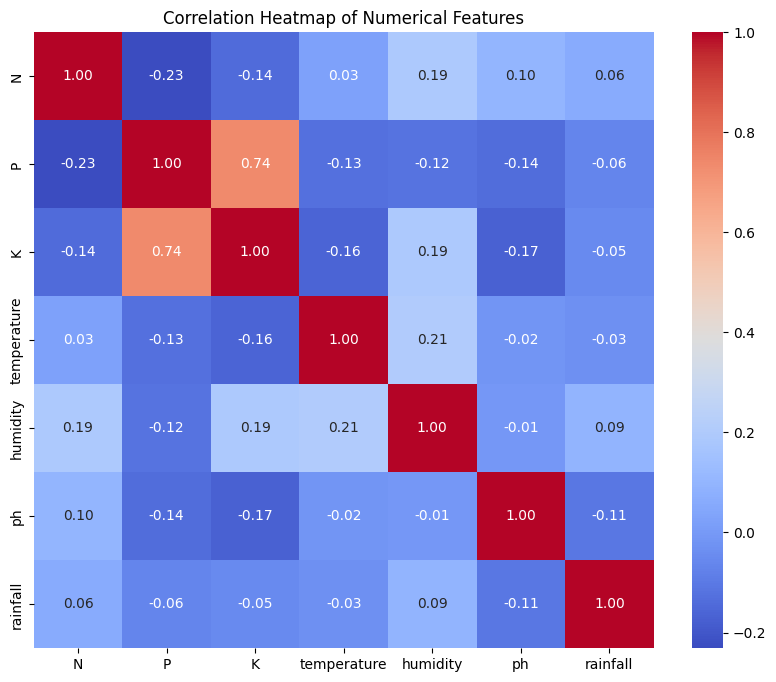

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [94]:
crop['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


/tmp/ipython-input-1536879614.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['humidity'])


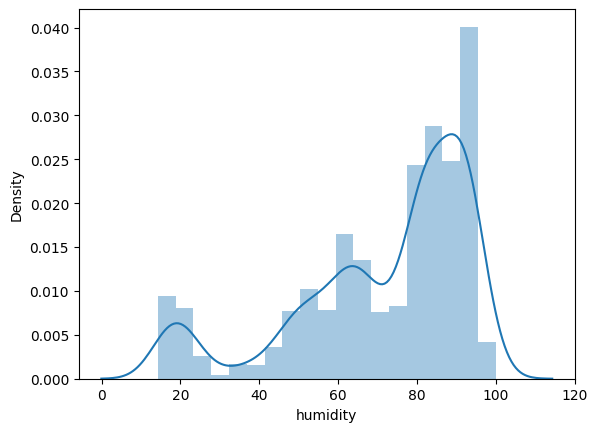

/tmp/ipython-input-1536879614.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['temperature'])


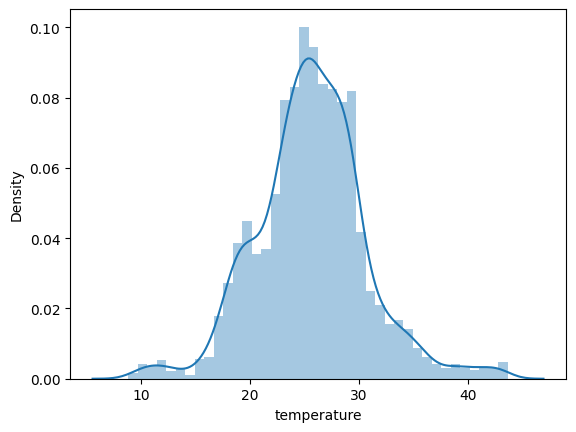

/tmp/ipython-input-1536879614.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['ph'])


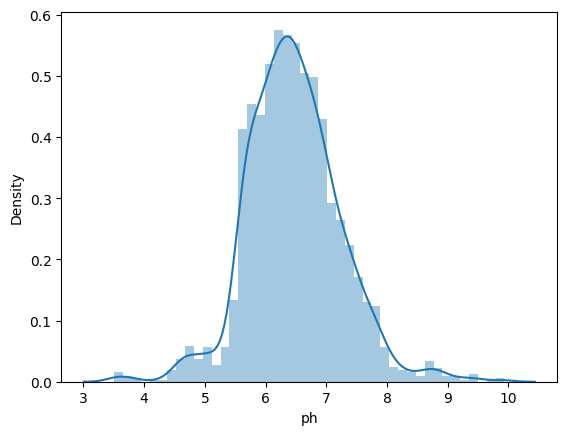

/tmp/ipython-input-1536879614.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['rainfall'])


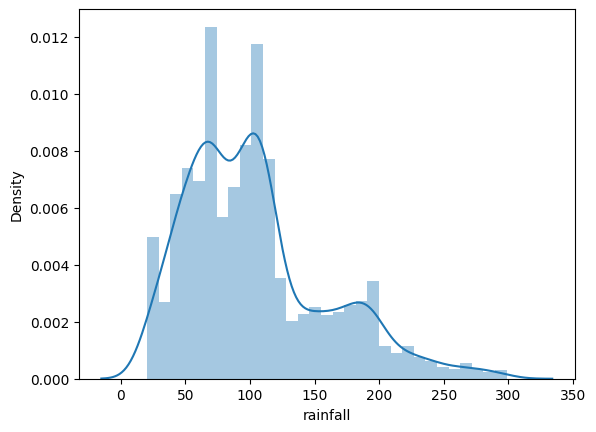

/tmp/ipython-input-1536879614.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


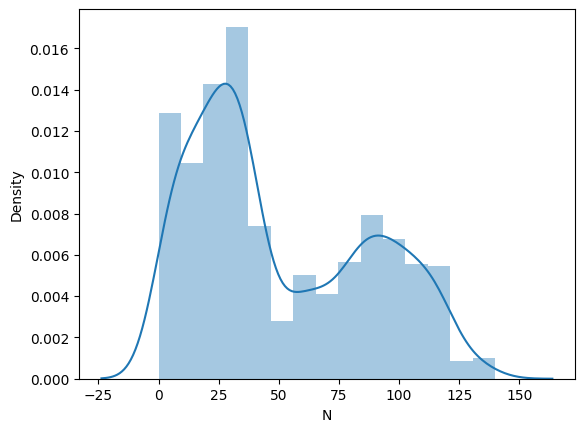

/tmp/ipython-input-1536879614.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['P'])


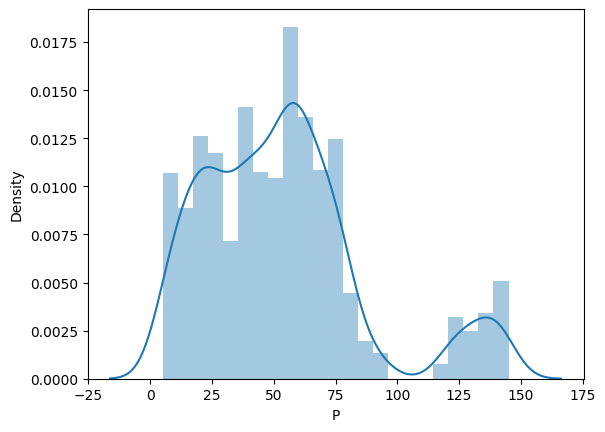

/tmp/ipython-input-1536879614.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['K'])


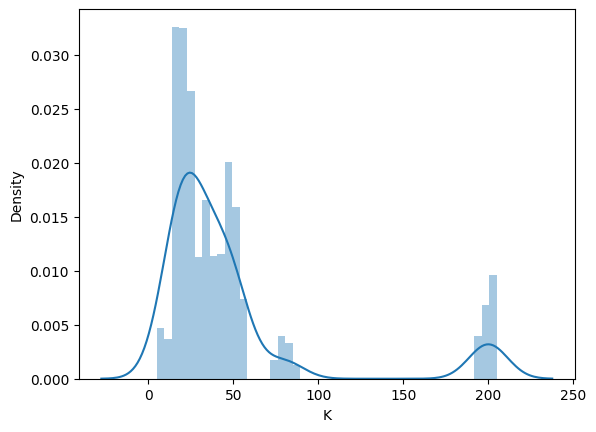

In [95]:
sns.distplot(crop['humidity'])
plt.show()
sns.distplot(crop['temperature'])
plt.show()
sns.distplot(crop['ph'])
plt.show()
sns.distplot(crop['rainfall'])
plt.show()


sns.distplot(crop['N'])
plt.show()
sns.distplot(crop['P'])
plt.show()
sns.distplot(crop['K'])
plt.show()

**Encoding**

In [96]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'chickpea': 3,
    'kidneybeans': 4,
    'pigeonpeas': 5,
    'mothbeans': 6,
    'mungbean': 7,
    'blackgram': 8,
    'lentil': 9,
    'pomegranate': 10,
    'banana': 11,
    'mango': 12,
    'grapes': 13,
    'watermelon': 14,
    'muskmelon': 15,
    'apple': 16,
    'orange': 17,
    'papaya': 18,
    'coconut': 19,
    'cotton': 20,
    'jute': 21,
    'coffee': 22
}
crop['crop_num'] = crop['label'].map(crop_dict)

In [97]:
crop['crop_num'].value_counts()

,count
crop_num,
1,100
2,100
3,100
4,100
5,100
6,100
7,100
8,100
9,100


In [98]:
crop.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
1862,17,30,27,29.030650,90.790939,5.894027,205.572037,coconut,19
1239,20,122,204,11.797647,80.863254,6.487370,65.069625,grapes,13
42,83,60,36,25.597049,80.145093,6.903986,200.834898,rice,1
1793,58,55,47,26.053758,93.691117,6.742490,240.686390,papaya,18
82,61,53,43,26.403232,81.056355,6.349606,223.367188,rice,1


In [99]:
crop.drop('label',axis=1,inplace=True)
crop.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,crop_num
832,2,78,23,21.318521,66.439346,7.320515,45.426168,9
1339,80,16,46,25.504055,81.402974,6.940236,48.478333,14
648,4,59,25,27.685151,81.942686,6.227134,54.622433,7
85,66,60,38,22.085766,83.470383,6.372576,231.736496,1
1400,115,17,55,27.578269,94.118782,6.776533,28.082532,15


**Train Test Split**

In [100]:
x = crop.drop('crop_num', axis=1)
y = crop['crop_num']


In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [102]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1760, 7), (440, 7), (1760,), (440,))

**scale the features using MinMaxScaler**

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [105]:
x_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [108]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),

    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')

Logistic Regression Accuracy: 0.9636363636363636
Decision Tree Accuracy: 0.9818181818181818
Random Forest Accuracy: 0.9931818181818182
Bagging Accuracy: 0.9863636363636363
AdaBoost Accuracy: 0.14545454545454545
Gradient Boosting Accuracy: 0.9818181818181818
SVM Accuracy: 0.9681818181818181
KNN Accuracy: 0.9659090909090909
Naive Bayes Accuracy: 0.9954545454545455


In [109]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.89      0.94        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        23
           6       1.00      0.96      0.98        24
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        20
           9       0.92      1.00      0.96        11
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        23
          17       1.00      1.00      1.00        14
          18       1.00    

**Predictive System**

In [112]:
from math import e
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
  input_data = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
  prediction = rfc.predict(input_data)
  print(prediction)

  if prediction[0] == 1:
    print('Rice')
  elif prediction[0] == 2:
    print('Maize')
  elif prediction[0] == 3:
    print('Chickpea')
  elif prediction[0] == 4:
    print('Kidneybeans')
  elif prediction[0] == 5:
    print('Pigeonpeas')
  elif prediction[0] == 6:
    print('mothbeans')
  elif prediction[0] == 7:
    print('mungbean')
  elif prediction[0] == 8:
    print('Blackgram')
  elif prediction[0] == 9:
    print('lentil')
  elif prediction[0] == 10:
    print('pomegranate')
  elif prediction[0] == 11:
    print('banana')
  elif prediction[0] == 12:
    print('mango')
  elif prediction[0] == 13:
    print('grapes')
  elif prediction[0] == 14:
    print('watermelon')
  elif prediction[0] == 15:
    print('muskmelon')
  elif prediction[0] == 16:
    print('apple')
  elif prediction[0] == 17:
    print('orange')
  elif prediction[0] == 18:
    print('papaya')
  elif prediction[0] == 19:
    print('coconut')
  elif prediction[0] == 20:
    print('cotton')
  elif prediction[0] == 21:
    print('jute')
  elif prediction[0] == 22:
    print('coffee')
  else:
    print('Error')


In [113]:
N=20
P=20
K=20
temperature=20
humidity=20
ph=20
rainfall=20
predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

[16]
apple
